## Introduction
Where did data come from?

The material id needs to be prepended by "mp-". The job is performed below

In [12]:
# import os
# import sys
# module_path = os.path.abspath(os.path.join(''))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
# print (module_path)

# from utils.editdf import EditFile 

# ed = EditFile()
# ed.generateFile('assets/HalfHeusler.csv', 'assets/Heusler compound.csv')

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# %pip install pymatgen
# %pip install sklearn

import os.path
import pandas as pd

# import pymatgen.core as pg
# from pymatgen.ext.matproj import MPRester
from math import sqrt
import sys

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
path_to_file = 'assets/HalfHeusler.csv'
file_name = 'assets/Heusler compound.csv'

if (not os.path.exists(file_name)):
    print ("A formatted csv file is produced\n")
    df = pd.read_csv(path_to_file)
    print (df.head())

    id_list = df['Materials-ID'].to_list()

    n = df.columns[0]
    df.drop(n, axis=1, inplace=True)

    df[n] = ["mp-" + str(x) for x in id_list]
    print (df.head())

    df.to_csv(file_name, index = False)

- Lattice parameters, atomic radii and atomic masses. The atomic radius is calculated value and not the empirical values
- Python library 'pymatgen'

In [ ]:
'''
The Element class is located in the core subpakage inside the periodic_table module. 
The link to the API documentation is below.

    https://pymatgen.org/pymatgen.core.periodic_table.html#pymatgen.core.periodic_table.Element

Similarly the material project APIs are hosted in the following module.

    https://pymatgen.org/pymatgen.ext.matproj.html?highlight=mprester#module-pymatgen.ext.matproj
'''

file_name_train = 'assets/Training data.csv'

if (not os.path.exists(file_name_train)):
    print ("Training data will be generated\n")

    heusler_df = pd.read_csv(file_name, header=0, usecols= ['Materials-ID', '4a-site', '4b-site', '4c-site'])
    data = []

    m = MPRester('fmdc9tZK1xE74JOq')
    for idx in heusler_df.index:
        mat_data = m.get_data(heusler_df['Materials-ID'][idx])
        lat = m.get_structure_by_material_id(heusler_df['Materials-ID'][idx])
        
        lat_const = lat.lattice.abc
        mag_moment = sum(lat.site_properties['magmom'])
        
        e1 = pg.Element(heusler_df['4a-site'][idx])
        e2 = pg.Element(heusler_df['4b-site'][idx])
        e3 = pg.Element(heusler_df['4c-site'][idx])

        x1 = e1.atomic_radius
        x2 = e2.atomic_radius
        x3 = e3.atomic_radius
        m1 = e1.atomic_mass
        m2 = e2.atomic_mass
        m3 = e3.atomic_mass
        
        
        x29 = m1+m2+m3
        x30 = x1+x2+x3
        x33 = (x29/3 -m1)
        x34 = (x29/3 -m2)
        x35 = (x29/3 -m3)
        x42 = (x30/3 -x1)
        x43 = (x30/3 -x2)
        x44 = (x30/3 -x3)
        x51 = (x1**2 + x2**2)
        x52 = (x1**2 + x3**2)
            
        data.append((x1,x2,x3,m1,m2,m3,m1**2,m2**2,m3**2,x1**2,x2**2,x3**2,
                     m1**3,m2**3,m3**3,x1**3,x2**3,x3**3,
                     sqrt(m1),sqrt(m2),sqrt(m3),sqrt(x1),sqrt(x2),sqrt(x3),
                     m2/m1, x3/m1, x2/x1,x3/x1, x29,x30,
                     ((m1**2+m2**2+m3**2)/3.)**2, ((x1**2+x2**2+x3**2)/3.)**2,
                     x33, x34, x35, abs(x33), abs(x34), abs(x35), x33**2, x34**2, x35**2,
                     x42, x43, x44, abs(x42), abs(x43), abs(x44), x42**2, x43**2, x44**2,
                     x51, x52,sqrt(x51), sqrt(x52), 
                     mat_data[0]["formation_energy_per_atom"], # mag_moment,
                     lat_const[0], lat_const[1], lat_const[2]
                    ))

    idx = []
    for i in range(1, 55):
        idx.append('x'+str(i))

#     idx.extend(['form_energy_per_atom', 'total_magnetic_moment','a', 'b', 'c'])
    idx.extend(['form_energy_per_atom','a', 'b', 'c'])
    df_train = pd.DataFrame(data, columns = idx)

    df_train.to_csv(file_name_train, index = False)

     |████████████████████████████████| 3.3 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 108 kB 51.6 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
     |████████████████████████████████| 98 kB 6.8 MB/s 
     |████████████████████████████████| 292 kB 57.6 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
  Using cached numpy-1.21.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
     |████████████████████████████████| 21.8 MB 1.5 MB/s 
     |████████████████████████████████| 546 kB 57.2 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.11-cp37-cp37m-linux_x86_64.whl size=3704988 sha256=516da0f76fa8296ab0fce36ee3925467b75149ade3618bbc24f81cb4add629f1
  Stored in directory: /root/.cache/pip/wheels/16/45/34/fe91dca23241fd3f9dd6df132c7d661b41c825357174ee9adf

## Machine Learning
The gradient boosted trees are selected for the regression task. The cross-validation is the first step.



### Cross-Validation
A five fold cross validation will be performed for the better performance of the model.

In [ ]:
df = pd.read_csv('assets/Training data.csv')
X = df.iloc[:, :-3]
y = df.iloc[:, -1]

k = 5
kf = KFold(n_splits=k)
scoreR2 = []
y_pred = []

gbReg = GradientBoostingRegressor(loss = 'lad', n_estimators=700, max_depth= 18, random_state= 44)

for train_idx, test_idx in kf.split(X):
#     X_train, X_test = X[train_idx, :], X[test_idx, :]
    X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    gbReg.fit(X_train, y_train)
    y_pred.extend(gbReg.predict(X_train))
    
    scoreR2.append(gbReg.score(X_test, y_test))
    
print (sum(scoreR2)/k)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbReg.fit(X_train, y_train)
print (gbReg.score(X_test, y_test))

0.8575876900175384
0.9153343661809036


## Grid Search
Hyperparameter tuning

In [ ]:
# %pip install numpy
# %pip install matplotlib

max_depth = [14, 16,18,20,22,24]
n_estimators = [100, 400, 700, 1000]
learning_rate = [0.09, 0.1, 0.11, 0.12]
param_grid = dict(max_depth=max_depth, n_estimators= n_estimators)

grid_search = GridSearchCV(gbReg, param_grid, scoring="r2", n_jobs=-1, cv=kf)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print ("\n")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

best_model = grid_result.best_estimator_
best_model.fit(X_train, y_train)
print ("The score for best estimator: \n")
print (best_model.score(X_test, y_test))

print ("\n")

for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='max_depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('R2 score')

KeyboardInterrupt: ignored

In [ ]:
scores = np.array(means).reshape(len(n_estimators),len(max_depth))
for i, value in enumerate(n_estimators):
    plt.plot(max_depth, scores[i], label='n_estimators: ' + str(value))
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('R2 score')

'''
    lr =0.1
    max_depth/n_estimators= 16/1000 or 20/700 or 18/700
'''

## Neural Network 

The Boosted Trees performed very well. It was on par with the published paper. A juxtaposition with an artificial neural network would be interesting. The latter must me a better choice. 

ANN is easy to build especially after the introduction of Keras module in Tensorflow. 

### Scaling
Use MinMaxScaler

In [13]:
df = pd.read_csv('assets/Training data.csv')

X = df.iloc[:, :-3]
y = df.iloc[:, -3:]

print  (X.head())
print (y.head())

trans = MinMaxScaler()
X_scaled = trans.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

     x1    x2    x3  ...       x53       x54  form_energy_per_atom
0  1.60  1.45  1.35  ...  2.159282  2.093442             -0.760831
1  1.45  1.25  1.10  ...  1.914419  1.820027             -0.191266
2  1.60  1.45  1.35  ...  2.159282  2.093442             -0.963594
3  1.75  1.45  1.35  ...  2.272664  2.210204             -0.835058
4  1.50  1.45  1.35  ...  2.086265  2.018044             -0.335699

[5 rows x 55 columns]
          a         b         c
0  4.611608  4.611608  4.611608
1  4.199121  4.199121  4.199121
2  4.320950  4.320950  4.320950
3  4.726488  4.726488  4.726488
4  4.412778  4.412778  4.412778


Epoch 1/500
4/4 [==============================] - 1s 52ms/step - loss: 4.3101 - r_square: -256.9555 - val_loss: 3.5226 - val_r_square: -149.0206
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 2.9793 - r_square: -103.0390 - val_loss: 1.7128 - val_r_square: -38.7368
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 1.1704 - r_square: -23.2328 - val_loss: 1.1347 - val_r_square: -22.4359
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1963 - r_square: -23.2320 - val_loss: 0.8720 - val_r_square: -13.5336
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7146 - r_square: -8.3092 - val_loss: 0.6759 - val_r_square: -6.3888
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6861 - r_square: -5.4671 - val_loss: 0.5350 - val_r_square: -3.7898
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4428 - r_square: -1.8550 - val_loss: 0.4312 - val_r_square: -2.

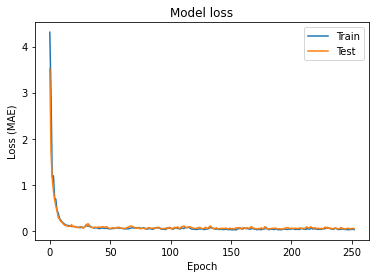


 The predicted values (Lattice constants)
[[4.2827845 4.2703204 4.306969 ]
 [4.6914296 4.658342  4.730707 ]
 [4.86942   4.828918  4.8983054]
 [4.7293053 4.7084804 4.7681227]
 [4.2890606 4.2833395 4.3068843]
 [4.752398  4.727884  4.797257 ]
 [4.7115426 4.6928344 4.742416 ]
 [4.880726  4.8537965 4.9106984]
 [4.4478483 4.434591  4.4646688]
 [4.254862  4.2334867 4.289799 ]
 [4.550314  4.5293427 4.585588 ]
 [4.5386987 4.5151696 4.5532045]
 [4.4747977 4.459124  4.5110674]
 [4.882081  4.8552732 4.9114995]
 [4.598859  4.574413  4.6266093]
 [4.169553  4.142847  4.197267 ]
 [4.6293    4.620746  4.674199 ]
 [4.7298837 4.708895  4.7684317]
 [4.712859  4.69437   4.743796 ]
 [4.928828  4.888222  4.957873 ]
 [4.7514505 4.725889  4.796786 ]
 [4.757066  4.726648  4.7845426]
 [4.5394583 4.5561624 4.565611 ]
 [5.6291165 5.6112447 5.696865 ]
 [4.127903  4.1272273 4.1611733]
 [4.133973  4.1193504 4.157015 ]
 [4.4987955 4.475101  4.5289187]
 [4.371417  4.364227  4.4015613]
 [4.352968  4.333571  4.3836083]]

In [14]:
# The seed is required for replication of results. Parameters defined.
seed = 1111
tolerance_value = 80
n_epochs = 500

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/SS_tot )

def build_model(n_hidden=2, n_neurons=400, learning_rate=1e-3, input_shape=[55,]):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(3))

    model.compile(loss="mae", optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=[r_square])

    return model

# The wrapper is neccessary for GridSearch later in this notebook
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

# The history dictionary is useful for 'loss' plot of the model. In this case, the 'loss' is mean absolute error 
history = keras_reg.fit(X_train_scaled, y_train, epochs=n_epochs,
              validation_data=(X_test_scaled, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=tolerance_value)])

# Test on the holdout data
mae_test = keras_reg.score(X_test_scaled, y_test)
y_pred = keras_reg.predict(X_test_scaled)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss (MAE)")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()


print ("\n The predicted values (Lattice constants)")
print (y_pred)
print ("\n The mean absolute error (MAE)")
print (mae_test)
print ("\n The R-square metric is")
print (r_square(tf.convert_to_tensor(value=y_test.values, dtype='float32'), y_pred))